# Zadanie 1
## Travelling Salesman Problem

In [65]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import imageio

from copy import deepcopy
from random import randrange, random, uniform, sample

## Introduction
Because the Travelling salesman problem is of NP-complete class, solving it for even quite small number of points is out of reach for today computer.
Simulated annealing is one of the heuristic approaches that allow to find a suboptimal solution.

## Points
Points that need to be connected by a loop are represened by a pair of real numbers. We use simple euclidian metric, so distance between each two (x1, y1), (x2, y2) is given by:
*d = sqrt( (x1 - x2)^2^ + (y1 - y2)^2^)*

In [66]:
def two_randrange(stop, start=0):
    a = randrange(start, stop)
    b = a
    while a == b:
        b = randrange(start, stop)
    return a, b

In [67]:
def distance(distances, i, j):
    return distances[min(i, j)][max(i, j)]

def total_distance(distances, order):
    result = 0
    for i in range(N):
        result += distance(distances, order[i], order[(i+1) % N])
    return result

def distance_to_neibours(distances, order, a):
    n = len(distances)
    return distance(distances, order[(a-1) % n], order[a]) + distance(distances, order[a], order[(a+1) % n])

def replace_and_get_distance_change(distances, order, a, b):
    delta = 0
    delta -= distance_to_neibours(distances, order, a)
    delta -= distance_to_neibours(distances, order, b)

    order[a], order[b] = order[b], order[a]
    delta += distance_to_neibours(distances, order, a)
    delta += distance_to_neibours(distances, order, b)

    return delta

In [68]:
def get_distances(points):
    distances = [[None for _ in range(N)] for _ in range(N)]
    for i in range(N):
        for j in range(i+1, N):
            x1, y1 = points[i]
            x2, y2 = points[j]
            distances[i][j] = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return distances

In [69]:
def save_frame(points, order, frame_number):
    plot_points(points, order)
    plt.savefig(f'./tmp/Task1/img_{frame_number}.png',
        transparent = False,
        facecolor = 'white'
       )
    plt.close()

### Simulation function
The simulation will have given number of iterations.
The temperature is represented by the function:
*y = a^i^*
where *a* is *temp_exponent* parameter.
At the begining of the simulation, random order of points is taken as a current loop.
In each iteration the neibouring state is generated by swapping two consecutive poins or two random ones. If the resulting distance is lower, then the new state is always accepted. Otherwise, it is determined by the current temperature, *acceptance_factor* parameter and a random factor. If state is not accepted, then the changes are reverted. One per *save_one_in_n_frames* states is saved as a *.png* for *.gif* file to be generated later.

In [70]:
def simulation(points, iterations, temp_exponent=0.95, acceptance_factor=1, consecutive_swap=False, save_one_in_n_frames=None):
    results = []
    order = [i for i in range(N)]
    distances = get_distances(points)
    frame_index = 0

    current_distance = total_distance(distances, order)
    best_so_far = math.inf, None
    temperature = 1

    for i in range(iterations):
        if consecutive_swap:
            a = randrange(N)
            b = (a + 1) % N
        else:
            a, b = two_randrange(N)
        temperature *= temp_exponent

        new_distance = current_distance + replace_and_get_distance_change(distances, order, a, b)
        if new_distance < best_so_far[0]:
            best_so_far = new_distance, deepcopy(order)

        if (new_distance - current_distance) * random() < acceptance_factor * temperature:
            current_distance = new_distance
        # Revert changes
        else:
            order[a], order[b] = order[b], order[a]

        if save_one_in_n_frames is not None and i % save_one_in_n_frames == 0:
            save_frame(points, order, frame_index)
            frame_index += 1
        results.append(current_distance)

    if best_so_far[0] < current_distance:
        save_frame(points, best_so_far[1], frame_index)
        frame_index += 1
        order = best_so_far[1]
        results.append(best_so_far[0])

    return results, order, frame_index

In [71]:
def plot_points(points, order):
    xs = [points[o][0] for o in order + [order[0]] ]
    ys = [points[o][1] for o in order + [order[0]] ]

    plt.plot(xs, ys, marker="s")

def plot_results(results):
    plt.plot([i for i in range(len(results))], results)

In [72]:
def create_gif(frames_number, looping=False):
    frames = []
    for i in range(frames_number):
        image = imageio.v2.imread(f'./tmp/Task1/img_{i}.png')
        frames.append(image)

    imageio.mimsave('./example.gif', ims=frames, fps = 5, loop=0 if looping else 1)

Functions for point generation

In [73]:
SIZE = (100, 100)
MEAN = (SIZE[0]/2, SIZE[1]/2)

def get_random_point():
    return uniform(0, SIZE[0]), uniform(0, SIZE[1])

def generate_uniform_points(size):
    return [get_random_point() for _ in range(size)]

def generate_multivariate_normal_points(size, deviation):
    return np.random.multivariate_normal(MEAN, cov=[[deviation**2, 0], [0, deviation**2]], size=size)

def generate_points_from_groups(size, deviation=5):
    # points = np.array([])
    points = []
    group_size = size // 9 + 1
    remainder = size % 9
    for x in (0, 50, 100):
        for y in (0, 50, 100):
            if remainder <= 0:
                group_size -= 1
                remainder = math.inf
            remainder -= 1
            points += np.random.multivariate_normal(mean=(x, y), cov=[[deviation**2, 0], [0, deviation**2]], size=group_size).tolist()
    # shuffle(points)
    points = sample(points, len(points))
    return points

# Examples

### N = 18
#### Uniform distribution
![title](examples/Task1/uniform_18_chart.png)
![title](examples/Task1/uniform_18.gif)

### N = 18
#### Normal distribution
![title](examples/Task1/normal_18_chart.png)
![title](examples/Task1/normal_18.gif)

### N = 18
#### Nine groups: *deviation=2*
![title](examples/Task1/cities_18_chart.png)
![title](examples/Task1/cities_18.gif)

### N = 40
#### Uniform distribution
![title](examples/Task1/uniform_40_chart.png)
![title](examples/Task1/uniform_40.gif)

### N = 40
#### Normal distribution
![title](examples/Task1/normal_40_chart.png)
![title](examples/Task1/normal_40.gif)

### N = 40
#### Nine groups: *deviation=2*
![title](examples/Task1/cities_40_chart.png)
![title](examples/Task1/cities_40.gif)

### N = 40
#### Nine groups: *deviation=10*
![title](examples/Task1/groups_40_chart.png)
![title](examples/Task1/groups_40.gif)

### N = 100
#### Uniform distribution
![title](examples/Task1/uniform_100_chart.png)
![title](examples/Task1/uniform_100.gif)

### N = 100
#### Normal distribution
![title](examples/Task1/normal_100_chart.png)
![title](examples/Task1/normal_100.gif)

### N = 100
#### Nine groups: *deviation=2*
![title](examples/Task1/cities_100_chart.png)
![title](examples/Task1/cities_100.gif)

### N = 100
#### Nine groups: *deviation=10*
![title](examples/Task1/groups_100_chart.png)
![title](examples/Task1/groups_100.gif)

### Code to generate simulations
Result will be saved as *example.gif*

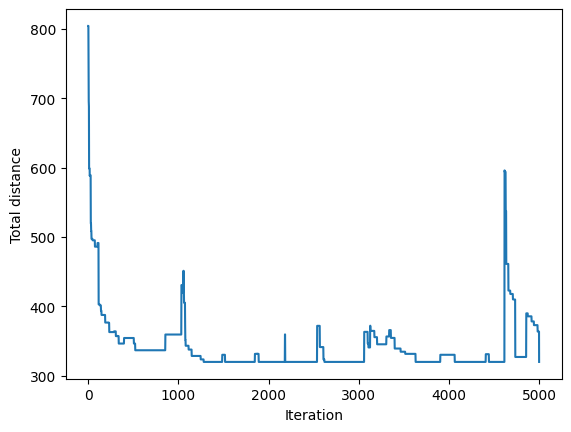

In [74]:
N = 15
TOTAL_ITERATIONS = 5_000

points = generate_uniform_points(size=N)
# points = generate_multivariate_normal_points(size=N, deviation=40)
# points = generate_points_from_groups(size=N, deviation=2)
# points = generate_points_from_groups(size=N, deviation=10)

results, order, frames_number = simulation(points, iterations=TOTAL_ITERATIONS, temp_exponent=0.99999, acceptance_factor=0.2, save_one_in_n_frames=1_000)

plot_results(results)
plt.xlabel("Iteration")
plt.ylabel("Total distance")
create_gif(frames_number, looping=False)